In [148]:
import matplotlib.pyplot as plt
import torch

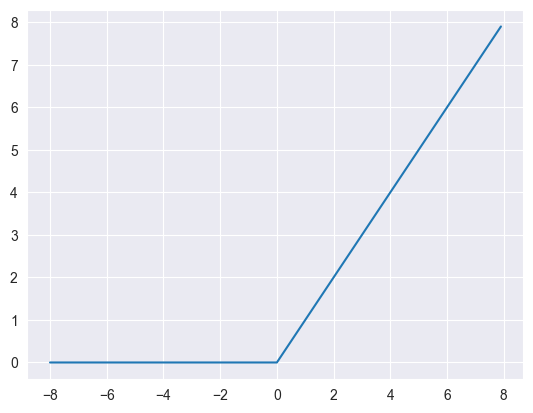

In [149]:
x=torch.arange(-8,8,0.1,requires_grad=True)
y=torch.relu(x)
plt.plot(x.detach(),y.detach())
plt.show()

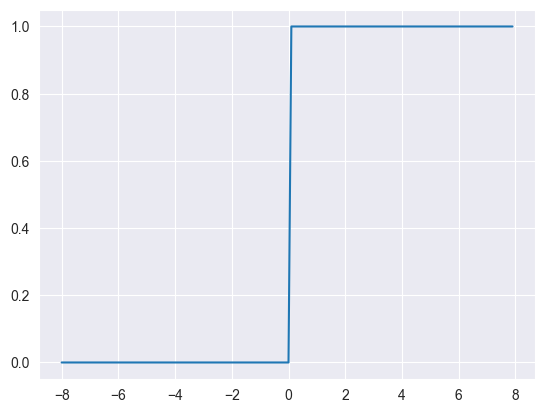

In [150]:
y.backward(torch.ones_like(x))
plt.plot(x.detach(),x.grad)
plt.show()

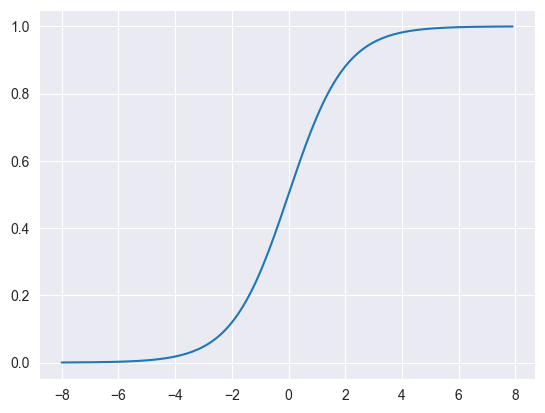

In [151]:
y=torch.sigmoid(x)
plt.plot(x.detach(),y.detach())
plt.show()

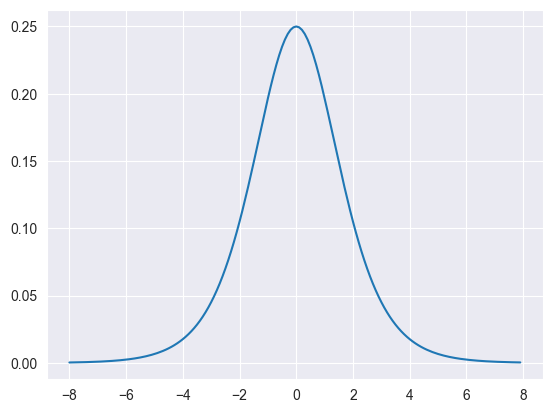

In [152]:
x.grad.data.zero_()
y.backward(torch.ones_like(x))
plt.plot(x.detach(),x.grad)
plt.show()


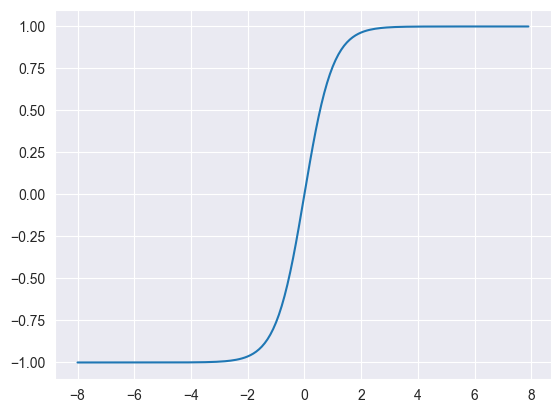

In [153]:
y = torch.tanh(x)
plt.plot(x.detach(), y.detach())
plt.show()


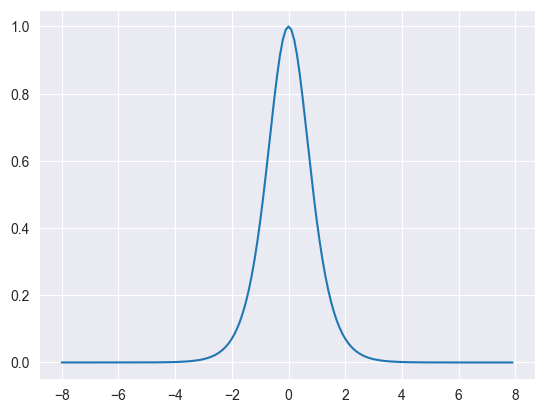

In [154]:
x.grad.data.zero_()
y.backward(torch.ones_like(x))
plt.plot(x.detach(),x.grad)
plt.show()

In [155]:
from torch.utils import data
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch import nn
mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())
batch_size=256
threat_num=4
train_iter=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=threat_num)
test_iter=data.DataLoader(mnist_test,batch_size,shuffle=True,num_workers=threat_num)

In [156]:
num_inputs=784
num_outputs=10
num_hidden=256

In [157]:
w1=torch.tensor(np.random.normal(0,0.01,(num_inputs,num_hidden)),dtype=torch.float,requires_grad=True)
b1=torch.zeros(num_hidden,dtype=torch.float,requires_grad=True)
w2=torch.tensor(np.random.normal(0,0.01,(num_hidden,num_outputs)),dtype=torch.float,requires_grad=True)
b2=torch.zeros(num_outputs,dtype=torch.float,requires_grad=True)
params=[w1,b1,w2,b2]

In [158]:
def relu(x):
    a=torch.zeros_like(x)
    return torch.max(x,a)

In [159]:
def net(x):
    x=x.reshape(-1,num_inputs)
    h=relu(torch.matmul(x,w1)+b1)
    return relu(torch.matmul(h,w2)+b2)

In [160]:
loss=nn.CrossEntropyLoss()

In [161]:
num_epochs=4
lr=0.01
optimizer=torch.optim.SGD(params,lr)

In [162]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

def predict(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = get_fashion_mnist_labels(y)
    preds = get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

In [163]:
def train(net,train_iter,test_iter,loss,num_epochs,optimizer):
    l1=[]
    l2=[]
    l3=[]
    for epoch in range(num_epochs):
        sum_loss,acc_train,n_train,acc_test,n_test=0,0,0,0,0
        for x,y in train_iter:
            k=net(x)
            l=loss(k,y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()

            sum_loss+=l
            acc_train+=(k.argmax(dim=1)==y).float().sum().item()
            n_train+=y.shape[0]
        for x,y in test_iter:
            k=net(x)
            acc_test+=(k.argmax(dim=1)==y).float().sum().item()
            n_test+=y.shape[0]
        print("epoch: "+str(epoch+1))
        print("acc_train: "+ str(acc_train/n_train))
        print("test_acc: "+str(acc_test/n_test))
        print("sum_loss: "+str(sum_loss.sum().item()/n_train))
        l1.append(acc_train/n_train)
        l2.append(acc_test/n_test)
        l3.append(sum_loss.sum().item()/n_train)
    plt.plot(range(num_epochs),l1)
    plt.plot(range(num_epochs),l2)
    plt.legend(["train_acc","test_acc"])
    plt.show()
    plt.plot(range(num_epochs),l3)
    plt.show()


epoch: 1
acc_train: 0.3202333333333333
test_acc: 0.3793
sum_loss: 0.00883943583170573
epoch: 2
acc_train: 0.40708333333333335
test_acc: 0.4434
sum_loss: 0.007944119262695313
epoch: 3
acc_train: 0.44815
test_acc: 0.4743
sum_loss: 0.006906577555338541
epoch: 4
acc_train: 0.5342333333333333
test_acc: 0.544
sum_loss: 0.005913993326822917
epoch: 5
acc_train: 0.5555
test_acc: 0.556
sum_loss: 0.005259337870279948


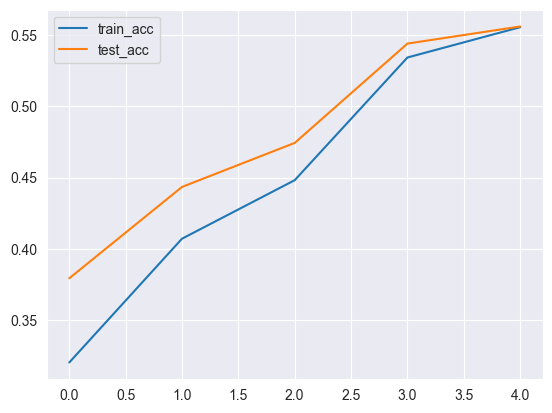

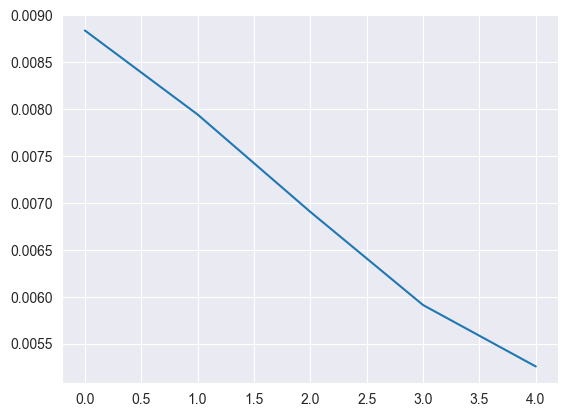

In [164]:
train(net,train_iter,test_iter,loss,5,optimizer)

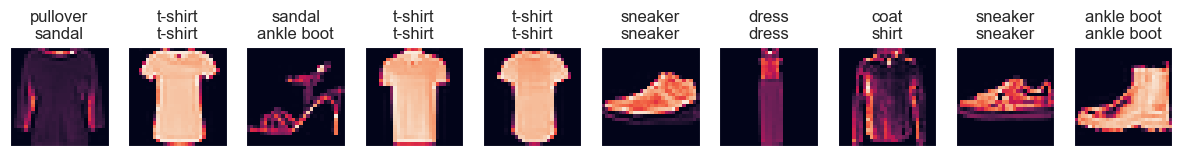

In [165]:
predict(net,test_iter,10)

In [166]:
from torch.nn import init

net=nn.Sequential(
    nn.Flatten(),
    nn.Linear(num_inputs,num_hidden),
    nn.ReLU(),
    nn.Linear(num_hidden,num_outputs))
for params in net.parameters():
    init.normal_(params,mean=0,std=0.01)
net

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

epoch: 1
acc_train: 0.6376333333333334
test_acc: 0.7133
sum_loss: 0.004065345764160156
epoch: 2
acc_train: 0.7904666666666667
test_acc: 0.8087
sum_loss: 0.0023404202779134116
epoch: 3
acc_train: 0.8185
test_acc: 0.7875
sum_loss: 0.0020421031951904298
epoch: 4
acc_train: 0.8310666666666666
test_acc: 0.8029
sum_loss: 0.0018873449961344401
epoch: 5
acc_train: 0.841
test_acc: 0.8251
sum_loss: 0.0017752335866292317


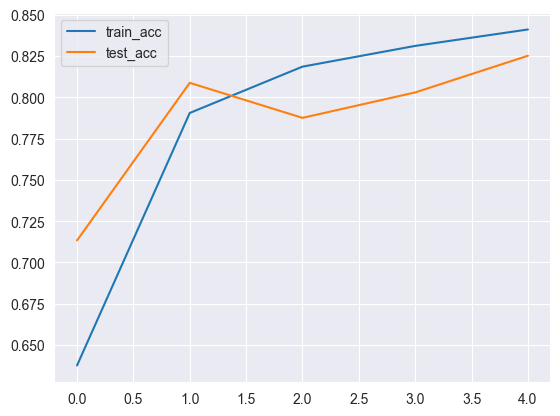

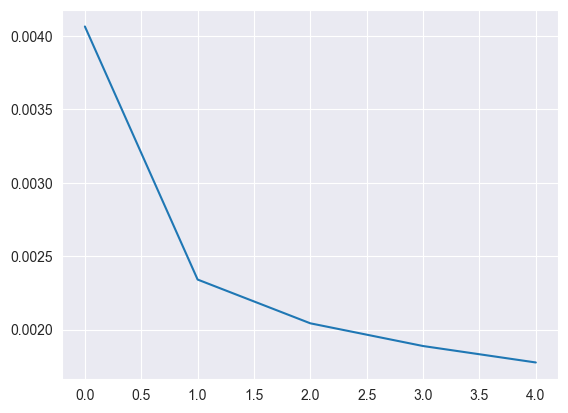

In [167]:
batch_size, lr, num_epochs = 256, 0.1, 5
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(net.parameters(),lr)
train(net,train_iter,test_iter,loss,num_epochs,optimizer)